In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression  # lineer regresyon fonksiyonu
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error  # Performans ölçümleri için gerekli.
from sklearn.model_selection import train_test_split

In [2]:
# Veriler
reklam_giderler = np.array([7,11,15,22,26,28,31]) # x
satislar = np.array([223,215,233,264, 305,316,320]) # y

In [3]:
# Verilerin pandasa dönüştürülmesi
df = pd.DataFrame({'reklam_giderleri': reklam_giderler, 'satislar': satislar})

In [4]:
df

,reklam_giderleri,satislar
0,7,223
1,11,215
2,15,233
3,22,264
4,26,305
5,28,316
6,31,320


In [5]:
# İndex sütununu yıllara göre verelim.
df.index = ['2001', '2002', '2003', '2004', '2005', '2006', '2007']
df

,reklam_giderleri,satislar
2001,7,223
2002,11,215
2003,15,233
2004,22,264
2005,26,305
2006,28,316
2007,31,320


Text(0, 0.5, 'Satış Gelirleri')

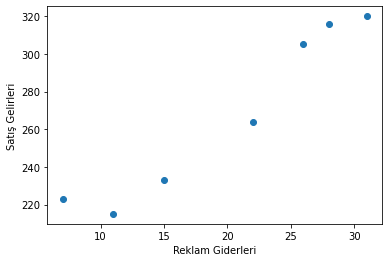

In [6]:
# Verilerin dağılım grafiği
plt.scatter(x=reklam_giderler,y=satislar)
plt.xlabel('Reklam Giderleri')
plt.ylabel('Satış Gelirleri')

<ErrorbarContainer object of 3 artists>

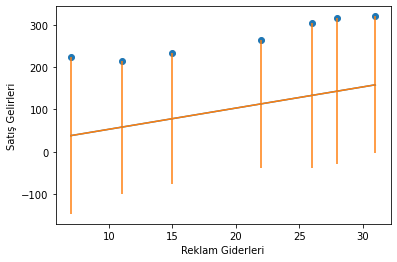

In [7]:
# deneme amaçlı reklam giderleri*5 + 3 denkleminin grafiği
plt.scatter(x=reklam_giderler,y=satislar)
plt.xlabel('Reklam Giderleri')
plt.ylabel('Satış Gelirleri')
plt.plot(reklam_giderler, reklam_giderler*5+3)
plt.errorbar(reklam_giderler, reklam_giderler*5+3, yerr=reklam_giderler*5+3-satislar)

<ErrorbarContainer object of 3 artists>

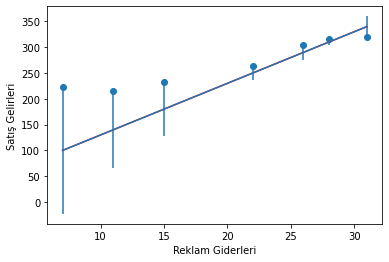

In [8]:
# uzak kaldığı için *10 +30 deneyelim.
plt.scatter(x=reklam_giderler,y=satislar)
plt.xlabel('Reklam Giderleri')
plt.ylabel('Satış Gelirleri')
plt.plot(reklam_giderler, reklam_giderler*10+30, color='red')
plt.errorbar(reklam_giderler, reklam_giderler*10+30, yerr=reklam_giderler*10+30-satislar)

Rastgele çizilen çizginin hatalarının fazla olacaktır. O nedenle bir öğrenme algoritması ile verilerin öğrenilmesi çalışması yapabiliriz.

**LinearRegression() parametreleri**
- fit_intercept bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).
- normalize is a Boolean (False by default) that decides whether to normalize the input variables (True) or not (False).
- copy_X is a Boolean (True by default) that decides whether to copy (True) or overwrite the input variables (False).
- n_jobs is an integer or None (default) and represents the number of jobs used in parallel computation. None usually means one job and -1 to use all processors.

In [9]:
lineer_model = LinearRegression()

**Modeli Oluştururken Kullanılacak Fonksiyonlar**
- fit(): Parametrelerin hesaplanmasını sağlar. Modele öğren demektir.
- transform(): Modelin veri setine uygulanmasını sağlar.
- fit_transform(): Fit ve Transform fonksiyonlarını birlikte sunar.

In [10]:
# beta_0 ve beta_1 i belirle
lineer_model.fit(reklam_giderler, satislar)

ValueError: Expected 2D array, got 1D array instead:
array=[ 7 11 15 22 26 28 31].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [11]:
# Hatanın çözümü için X'in sütun sütun verilmesi gerekiyor.
reklam_giderler = reklam_giderler.reshape(-1,1)

In [13]:
# beta_0 ve beta_1 i belirle
lineer_model.fit(reklam_giderler, satislar)

LinearRegression()

In [15]:
# beta_0,1 i yazdır
print('beta_0= {} beta_1 = {}'.format(lineer_model.intercept_,
                                      lineer_model.coef_[0]))

beta_0= 171.72 beta_1 = 4.814


In [16]:
# Modelin r2 skoru
lineer_model.score(reklam_giderler, satislar)

0.9305571795695471

Öğrenme performansından memnun isek tahmin aşamasına geçilebilir. Tahmin için kullanacağımız fonksiyon
- predict(): Predict using the linear model.


Tahmin edilen değerler aşağıdaki gibidir.

In [17]:
lineer_model.predict(reklam_giderler)

array([205.418, 224.674, 243.93 , 277.628, 296.884, 306.512, 320.954])

In [18]:
# Gerçek değerler
satislar

array([223, 215, 233, 264, 305, 316, 320])

In [20]:
# Hatalar (Errors)
satislar_tahmin = lineer_model.predict(reklam_giderler)
hatalar = satislar_tahmin - satislar
hatalar

array([-17.582,   9.674,  10.93 ,  13.628,  -8.116,  -9.488,   0.954])

In [22]:
# Hataların toplamı
hatalar.sum().round()

0.0

In [23]:
# hataların karesi
hatalarin_karesi = np.square(hatalar)
hatalarin_karesi

array([309.126724,  93.586276, 119.4649  , 185.722384,  65.869456,
        90.022144,   0.910116])

In [24]:
# Ortalama Karesel Hatalar (MSE - Mean Squared Error)
mse = np.mean(hatalarin_karesi)
mse

123.52885714285706

In [25]:
# Scikit-learn ile MSE
mean_squared_error(satislar, satislar_tahmin)

123.52885714285706

In [26]:
# Ortalama Mutlak Hatalar (MAE - Mean Absolute Error)
mae = np.mean(np.abs(hatalar))
print(mae)

10.053142857142856


In [27]:
# Scikit-learn ile MAE
mean_absolute_error(satislar, satislar_tahmin)

10.053142857142856

In [28]:
# Ortalama Karesel Hataların Karekökü (RMSE - Root Mean Squared Error)
rmse = np.sqrt(mse)
rmse

11.114353653850369

In [29]:
# Scikit-learn ile RMSE
mean_squared_error(satislar, satislar_tahmin, squared=False)

11.114353653850369

**Bias ve Varyans**

Varyans, gerçekleşen değerlerin tahmin edilen değerlerin ortalamasından ne kadar saptığını gösterir. r2 skoru ile hesaplanır seviyesi hesaplanır. MSE ile alakalıdır.

In [30]:
varyans = np.var(hatalar)
varyans

123.52885714285706

**score()**: Gerçek değerler ile tahmin değerleri arasındaki hataları karşılaştırır.
**r2 skoru**
bağımsız değişkenin öngörebildiği bağımlı değişkendeki varyans oranı

diğer tanımla;

(model tarafından açıklanan toplam varyans) / toplam varyans

$𝑅^2=1−\frac{\sum𝑒_𝑖^2}{\sum(𝑌−\overline{𝑌})^2}$


In [31]:
r2_skoru = 1 - (hatalarin_karesi /
                ((satislar - satislar.mean())**2).sum()).sum()
r2_skoru

0.9305571795695471

In [32]:
# Scikitlearn içerisinde r2 score
r2_score(satislar, satislar_tahmin)

0.9305571795695471

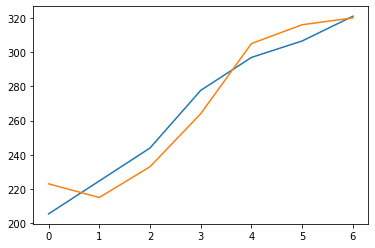

In [33]:
# Sonuçların görselleştirilmesi
plt.plot(satislar_tahmin)
plt.plot(satislar)

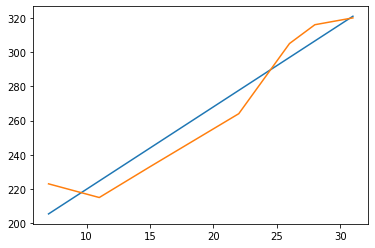

In [34]:
# x değerlerini verelim.
plt.plot(reklam_giderler, satislar_tahmin)
plt.plot(reklam_giderler, satislar)

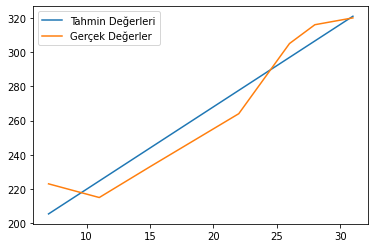

In [35]:
# etiketlerin eklenmesi
plt.plot(reklam_giderler, satislar_tahmin, label='Tahmin Değerleri')
plt.plot(reklam_giderler, satislar, label='Gerçek Değerler')
plt.legend()

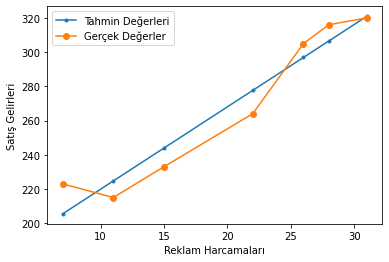

In [36]:
# Marker eklenmesi
plt.plot(reklam_giderler, satislar_tahmin, label='Tahmin Değerleri', marker='.')
plt.plot(reklam_giderler, satislar, label='Gerçek Değerler', marker='o')
plt.xlabel('Reklam Harcamaları')
plt.ylabel('Satış Gelirleri')
plt.legend()

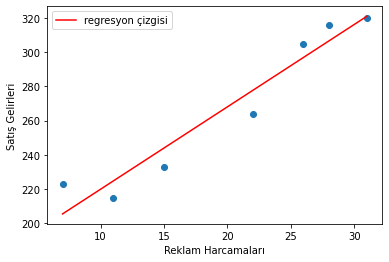

In [39]:
# regresyon çizgisi
plt.scatter(x=reklam_giderler,y=satislar)
plt.plot(reklam_giderler, reklam_giderler*lineer_model.coef_[0]+lineer_model.intercept_, color='red', label='regresyon çizgisi')
plt.xlabel('Reklam Harcamaları')
plt.ylabel('Satış Gelirleri')
plt.legend()